In [1]:
import xgboost
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris_df = sns.load_dataset("iris")

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='petal_length'>

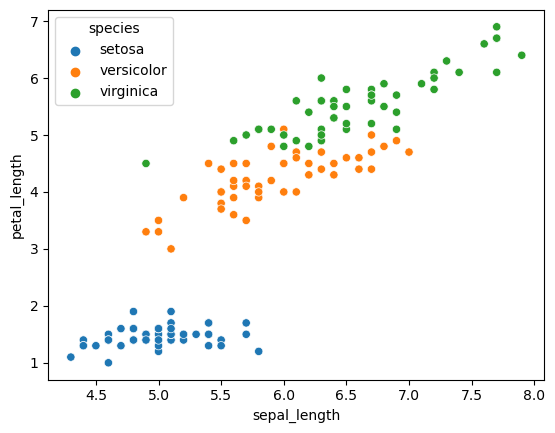

In [4]:
sns.scatterplot(iris_df, x="sepal_length", y="petal_length", hue="species")

In [17]:
numeric_cols = iris_df.select_dtypes(np.number).columns.tolist()
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [20]:
X = iris_df[numeric_cols]

In [18]:
from sklearn.cluster import KMeans

In [34]:
model = KMeans(n_clusters=3, random_state=43, n_init="auto")

In [35]:
model.fit(X)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=43)

In [36]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [37]:
preds = model.predict(X)

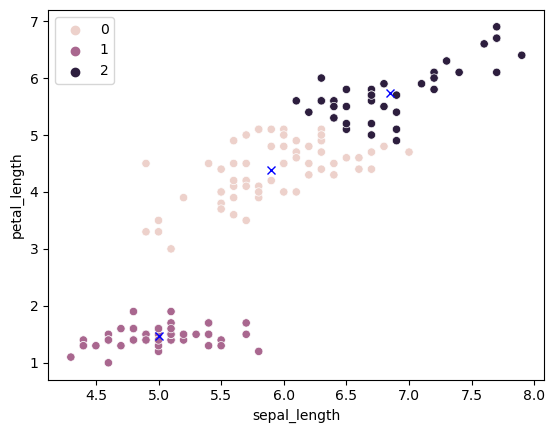

In [59]:
sns.scatterplot(data=X, x="sepal_length", y="petal_length", hue=preds)
centers_x, centers_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]
plt.plot(centers_x, centers_y, "xb")

In [60]:
model.inertia_

78.85144142614601

In [63]:
model = KMeans(n_clusters=6, random_state=43, n_init="auto").fit(X)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [64]:
preds = model.predict(X)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

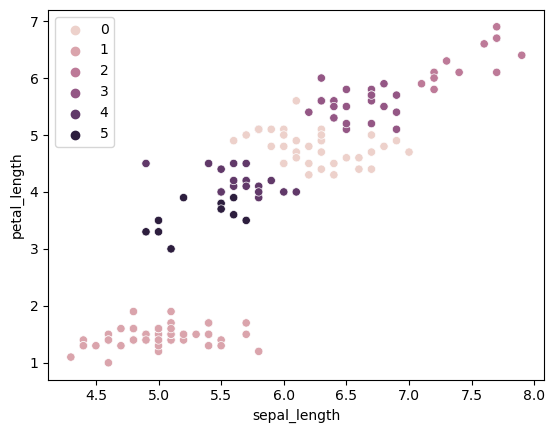

In [65]:
sns.scatterplot(X, x="sepal_length", y="petal_length", hue=preds)

In [66]:
model.inertia_

42.41866636957813

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Text(0, 0.5, 'Inertia')

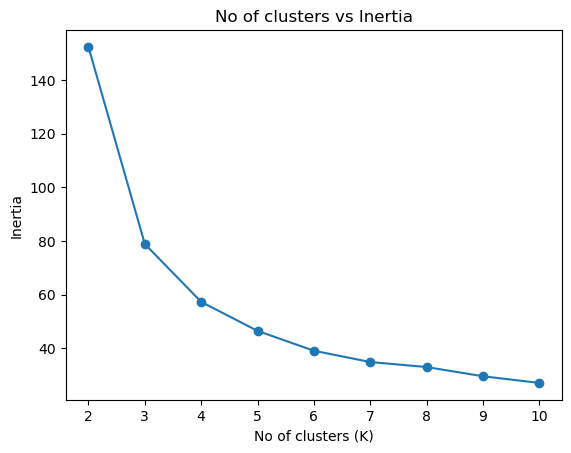

In [68]:
options = range(2, 11)
inertias = []
for n_clusters in options:
    model = KMeans(n_clusters, random_state=42, n_init="auto").fit(X)
    inertias.append(model.inertia_)
plt.title("No of clusters vs Inertia")
plt.plot(options, inertias, "-o")
plt.xlabel("No of clusters (K)")
plt.ylabel("Inertia")